<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Qiskit_HelloWorld_with_IBM_runtime_LocalAerSimulator_mkbahk_20241015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
%pip install qiskit[visualization]=='1.2.4'
#%pip install qiskit_ibm_runtime=='0.30.0'
%pip install qiskit_aer=='0.15.1'

In [115]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [116]:
%pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.7.0.32.46
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

In [117]:
import qiskit
qiskit.__version__

'1.2.4'

In [118]:
import qiskit_aer
qiskit_aer.__version__

'0.15.1'

In [119]:
from qiskit_aer import AerSimulator

local_simulator = AerSimulator(method="statevector") # 'automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop'

print(local_simulator)

AerSimulator('aer_simulator_statevector')


In [120]:
print(local_simulator.max_circuits)

None


In [121]:
local_simulator.description

'A C++ Qasm simulator with noise'


# Qiskit Runtime Programming 절차
1. Map the Problem to Circuits and Operators
2. Optimize the Circuit
3. Execute it on a Backend
4. Post-Process the Results




# Hello World example on a 2-Qubit Bell State

1. Map the Problem to Circuits and Operators

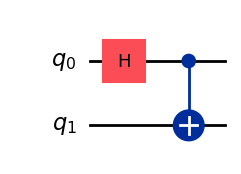

In [122]:
#아래 circuit은 estimator primitive를 위한 것

from qiskit import QuantumCircuit

bell_circuit = QuantumCircuit(2)
#bell_circuit = QuantumCircuit(2, 2) # estimator에서 에러
bell_circuit.h(0)
bell_circuit.cx(0, 1)
#bell_circuit.measure([0,1], [0,1]) # estimator에서는 사용않함
bell_circuit.draw(output='mpl')

Qiskit Runtime 서비스에 새롭게 추가된 Operator를 이용한 기대값 측정방법을 위해 observables 생성<br>

Qiskit Runtime 서비스는 이전의 확률분포 반환에서 추가적으로 데이터를 반환하는 두 가지 방법을 제공합니다.
1.   측정하기로 선택한 큐비트 집합에 대한 확률 분포

```
# 회로 실행 및 결과 얻기
job = sampler.run(circuit)
result = job.result()
counts = result.quasi_dists[0]
# 결과 출력
print(counts)
```

2.   관측 가능한 값의 기대값

```
# 회로 실행 및 결과 얻기
job = estimator.run(observable, circuit)
result = job.result()
expectation_value = result.values[0]
# 결과 출력
print(expectation_value)
```
?? Real QPU는 Sampler Primitive에서 확률분포를 지원하지 않음(버그인지 확인필요)

In [123]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')

XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

# Step 2: Optimize

# Step 3: Execute on the backend

In [124]:
from qiskit_aer.primitives import Estimator
estimator = Estimator()

In [125]:
job = estimator.run([bell_circuit] * len(observables), observables)
job.result()

EstimatorResult(values=array([ 1.        , -0.02539062, -0.02539062,  1.        , -0.01757812,
       -0.01757812]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.001826115, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000547582, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9993553161621094, 'simulator_metadata': [{'time_taken': 0.001826115, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.00

In [126]:
job.result().values

array([ 1.        , -0.02539062, -0.02539062,  1.        , -0.01757812,
       -0.01757812])

In [127]:
job.result().metadata

[{'shots': 1024,
  'variance': 0.0,
  'simulator_metadata': [{'time_taken': 0.001826115,
    'num_bind_params': 1,
    'parallel_state_update': 2,
    'parallel_shots': 1,
    'required_memory_mb': 0,
    'input_qubit_map': [[1, 1], [0, 0]],
    'method': 'stabilizer',
    'device': 'CPU',
    'num_qubits': 2,
    'sample_measure_time': 0.000547582,
    'active_input_qubits': [0, 1],
    'num_clbits': 2,
    'remapped_qubits': False,
    'runtime_parameter_bind': False,
    'max_memory_mb': 12978,
    'noise': 'ideal',
    'measure_sampling': True,
    'batched_shots_optimization': False,
    'fusion': {'enabled': False}}]},
 {'shots': 1024,
  'variance': 0.9993553161621094,
  'simulator_metadata': [{'time_taken': 0.001826115,
    'num_bind_params': 1,
    'parallel_state_update': 2,
    'parallel_shots': 1,
    'required_memory_mb': 0,
    'input_qubit_map': [[1, 1], [0, 0]],
    'method': 'stabilizer',
    'device': 'CPU',
    'num_qubits': 2,
    'sample_measure_time': 0.000547582,


# Step 4: Post-process (and plotting)

In [128]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

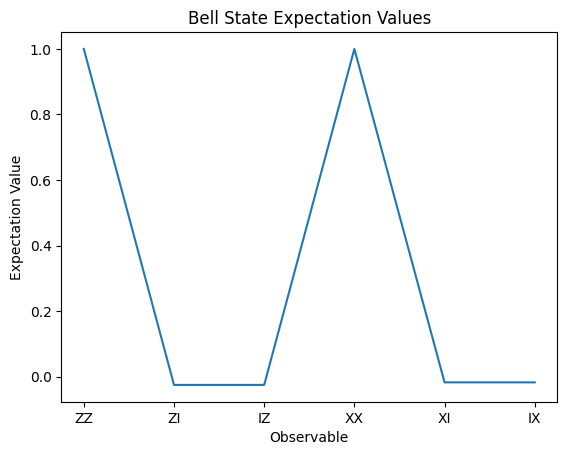

In [129]:
plt.plot(data, values)
plt.xlabel('Observable')
plt.ylabel('Expectation Value')
plt.title('Bell State Expectation Values')
plt.show()

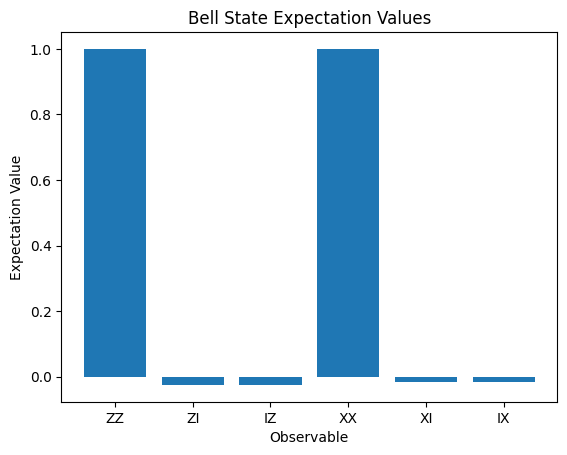

In [130]:
plt.bar(data, values)
plt.xlabel('Observable')
plt.ylabel('Expectation Value')
plt.title('Bell State Expectation Values')
plt.show()

Sampler 용 코드들

In [131]:
from qiskit_aer.primitives import Sampler

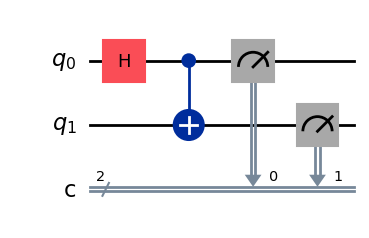

In [132]:
from qiskit import QuantumCircuit

bell_circuit = QuantumCircuit(2, 2)
bell_circuit.h(0)
bell_circuit.cx(0, 1)
bell_circuit.measure([0,1], [0,1])
bell_circuit.draw(output='mpl')

In [133]:
# bell_circuit.measure([0,1], [0,1])을 풀어주세요.

job = sampler.run(bell_circuit)
result = job.result()
counts = result.quasi_dists[0]
print(counts)

{0: 0.478515625, 3: 0.521484375}


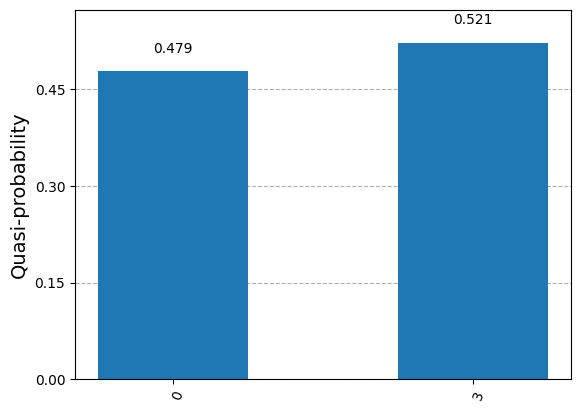

In [134]:
from qiskit.visualization import plot_histogram # Import plot_histogram
plot_histogram(counts)